In [ ]:
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector, Parameter
import numpy as np
import math

import pickle

import sys
sys.path.append('../../../')
from src import customFunc as cf
from src import ansatzs as anz
from src import variances as var

from qiskit.quantum_info import SparsePauliOp

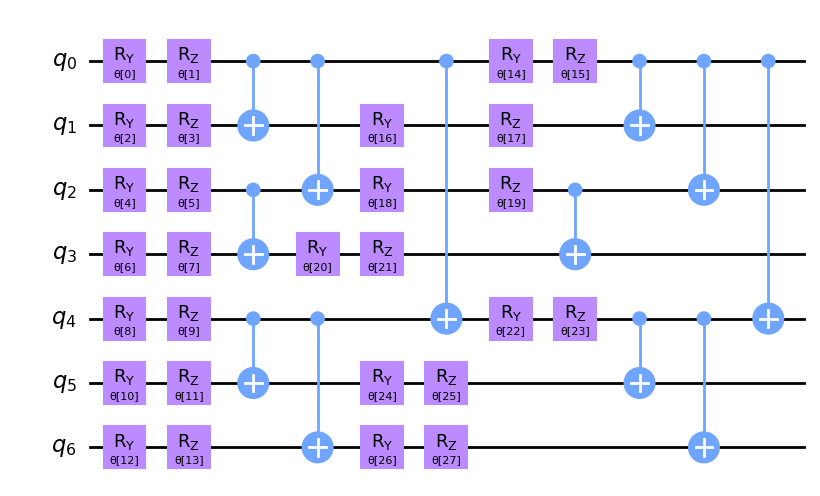

In [106]:
def log_depth_local_2_design_ansatz(num_qubits, num_layers):
    qc = QuantumCircuit(num_qubits)
    total_params = num_layers * num_qubits * 2
    params = ParameterVector("θ", total_params)
    param_offset = 0

    for layer in range(num_layers):
        # Apply parameterized single-qubit rotations
        for i in range(num_qubits):
            qc.ry(params[param_offset], i)
            param_offset += 1
            qc.rz(params[param_offset], i)
            param_offset += 1

        # Apply log-depth entangling layers
        log_d = int(math.ceil(math.log2(num_qubits)))
        for d in range(log_d):
            step = 2**d
            for i in range(0, num_qubits - step, 2 * step):
                qc.cx(i, i + step)

    return qc, params

def build_ala_ansatz(num_qubits):
    ansatz, params = log_depth_local_2_design_ansatz(num_qubits, num_layers=2)
    return ansatz, ansatz.num_parameters

ansatz, num_params= build_ala_ansatz(7)
ansatz.draw("mpl")
# ansatz.depth()

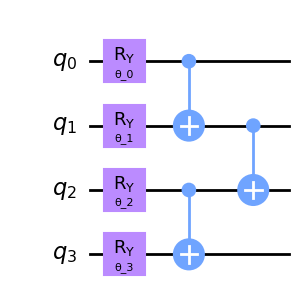

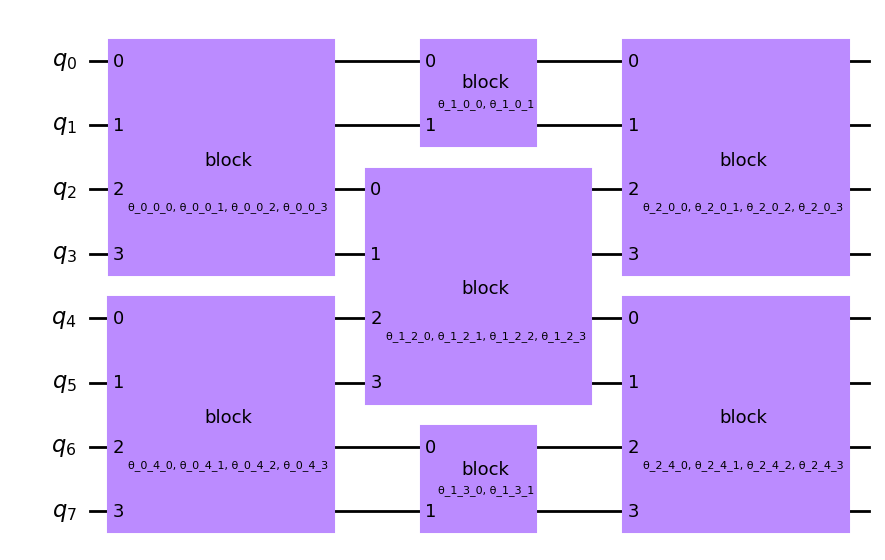

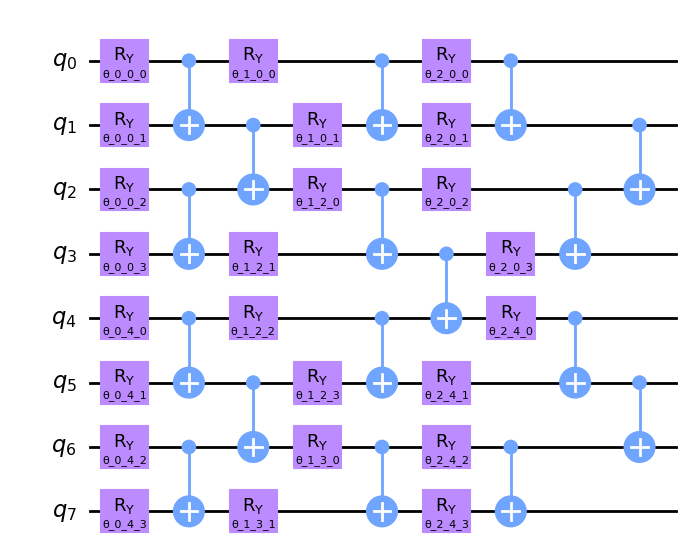

In [209]:
# Otro ansatz con más sentido

def block(n: int, param_prefix: str = "θ"):
    qc = QuantumCircuit(n)
    for i in range(n):
        qc.ry(Parameter(param_prefix + "_" + str(i)), i)
    for i in range(0, n-1, 2):
        qc.cx(i, i+1)
    for i in range(1, n-1, 2):
        qc.cx(i, i+1)
    qc.name = "block"
    return qc

def alt(l: int, n: int, m: int):
    if m % 2 != 0:
        raise Exception("Parameter `m` must be an even number")
    if n % m != 0:
        raise Exception("Parameter `n` divided by `m` must be integer")
    
    qc = QuantumCircuit(n)
    for i in range(l):
        if (i + 1) % 2 == 0:
            qc.append(block(m//2, param_prefix=f"θ_{i}_0"), range(0, m//2))
            for j in range(m//2, n-m//2, m):
                qc.append(block(m, param_prefix=f"θ_{i}_{j}"), range(j, j+m))
            qc.append(block(m//2, param_prefix=f"θ_{i}_{j+1}"), range(n-m//2, n))
        else:
            for j in range(0, n, m):
                qc.append(block(m, param_prefix=f"θ_{i}_{j}"), range(j, j+m))
    return qc

def build_ala_ansatz(num_qubits):
    ansatz = alt(3, num_qubits, 2)
    return ansatz, ansatz.num_parameters

display(block(4).draw("mpl"))
display(alt(3, 8, 4).draw("mpl"))
display(alt(3, 8, 4).decompose().draw("mpl"))

## Alternating Layered Ansatz (Local Observable)


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.3577290127255808
Varianza de la derivada: 1.4238632093227822e-32

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.35609199838158756
Varianza de la derivada: 1.2419608921381205e-32

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.3968835434714018
Varianza de la derivada: 8.788335418787127e-33

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.34376335116558143
Varianza de la derivada: 1.4477218565793597e-32

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 0.3847042645736276
Varianza de la derivada: 3.230403722375073e-32

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 0.3372062398899185
Varianza de la derivada: 1.3235288004230914e-31

Pendiente para valor esperado: -0.002960531257848596.
R^2 para valor esperado: 0.0302516634696874.

Pendiente para derivada: 0.2073494582798775.
R^2 para derivada: 0.6146493954537944.


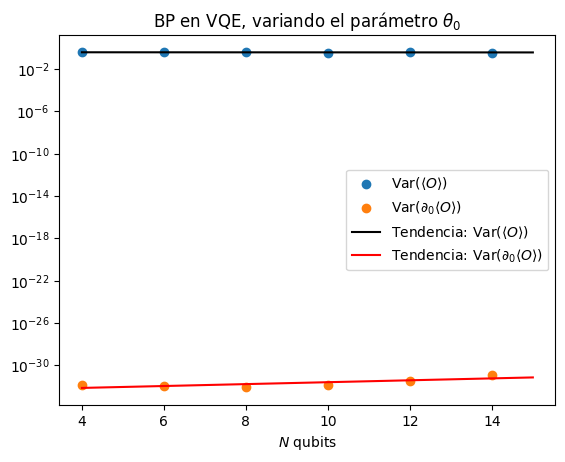


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.314421228298575
Varianza de la derivada: 1.336922639032011e-32

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.37425426903541537
Varianza de la derivada: 1.3876347818801571e-32

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.3205741084919625
Varianza de la derivada: 1.0567432783948742e-32

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.3946890805094728
Varianza de la derivada: 1.8532809779900328e-32

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 0.3680642918421788
Varianza de la derivada: 3.011936026171254e-32

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 0.36591430046014845
Varianza de la derivada: 2.8602132039067863e-31

Pendiente para valor esperado: 0.013089704511824018.
R^2 para valor esperado: 0.289824434612889.

Pendiente para derivada: 0.26003238584838856.
R^2 para derivada: 0.6282642307630623.


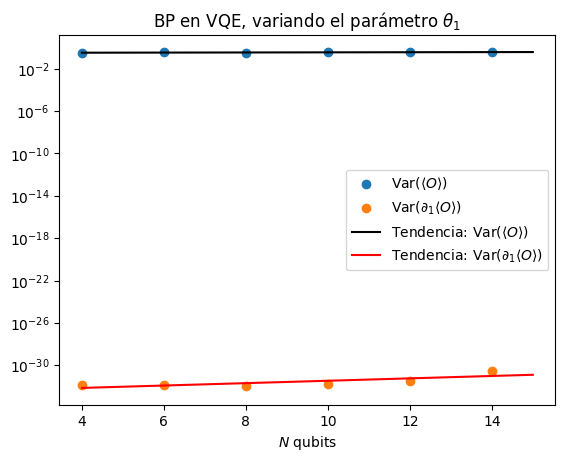


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.3886501528139314
Varianza de la derivada: 0.09632273980315324

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.3744073109529844
Varianza de la derivada: 7.998330710542991e-33

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.3291250664545115
Varianza de la derivada: 6.987719673856801e-33

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.39620356837091875
Varianza de la derivada: 1.1452301973982204e-32

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 0.4076713453700675
Varianza de la derivada: 0.10622478163488874

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 0.358965887130121
Varianza de la derivada: 1.0883764132334508e-31

Pendiente para valor esperado: 0.0006225763361561046.
R^2 para valor esperado: 0.0008978018097728669.

Pendiente para derivada: -1.8470190186005093.
R^2 para derivada: 0.035596799905861065.


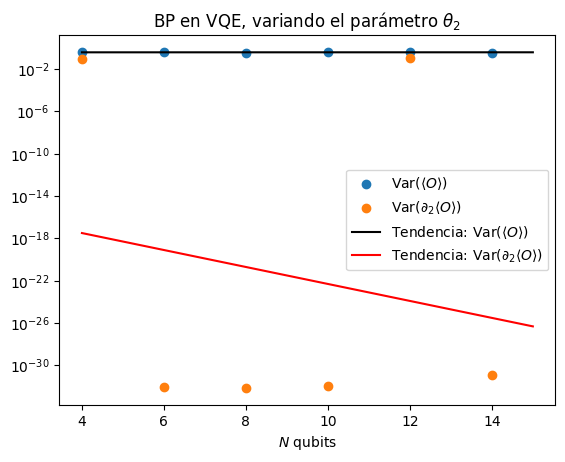


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.43127655172824286
Varianza de la derivada: 0.35481698313983634

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.3822688621480205
Varianza de la derivada: 1.2416468169746992e-32

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.35450610949293543
Varianza de la derivada: 1.1689588424660267e-32

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.35064209173193417
Varianza de la derivada: 1.6410576322626332e-32

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 0.35188148851541784
Varianza de la derivada: 0.39445381833986626

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 0.34360171326612204
Varianza de la derivada: 1.3236209952913825e-31

Pendiente para valor esperado: -0.019939722934730515.
R^2 para valor esperado: 0.750916726503234.

Pendiente para derivada: -1.891010668242277.
R^2 para derivada: 0.036357981090346325.


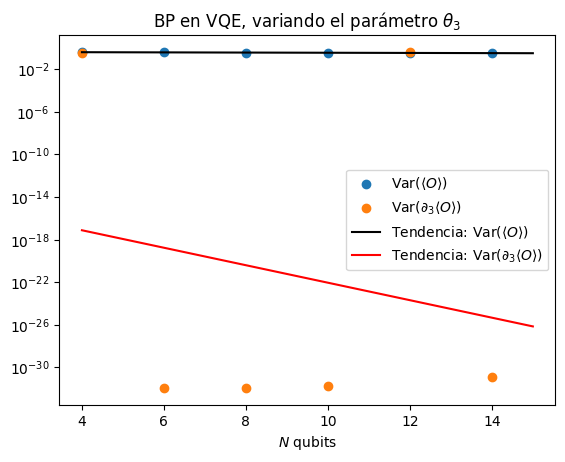


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.44518914105135093
Varianza de la derivada: 6.567223157111796e-33

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.44598662335145434
Varianza de la derivada: 0.11755338374973899

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.328751901141951
Varianza de la derivada: 4.956794786818595e-33

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.3817246389093819
Varianza de la derivada: 1.5165687857105516e-32

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 0.39816581759220154
Varianza de la derivada: 2.975055275888605e-32

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 0.42294967611947876
Varianza de la derivada: 0.1218454503422786

Pendiente para valor esperado: -0.006387074619865016.
R^2 para valor esperado: 0.04262017871420258.

Pendiente para derivada: 2.1393508425506345.
R^2 para derivada: 0.047035438158983894.


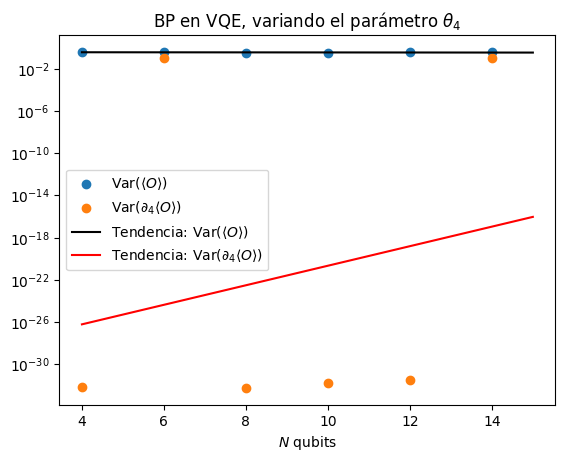


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.45106582205100126
Varianza de la derivada: 1.0286378216045667e-32

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.38674595455792066
Varianza de la derivada: 0.35378995170303845

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.3870308903670484
Varianza de la derivada: 9.343575699115543e-33

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.37369020641543754
Varianza de la derivada: 1.2020444687192256e-32

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 0.39646094251480796
Varianza de la derivada: 3.1077768547604633e-32

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 0.35416979499290036
Varianza de la derivada: 0.35868909359265144

Pendiente para valor esperado: -0.016711900438404825.
R^2 para valor esperado: 0.5985294093210863.

Pendiente para derivada: 2.126693869065471.
R^2 para derivada: 0.04537989675654023.


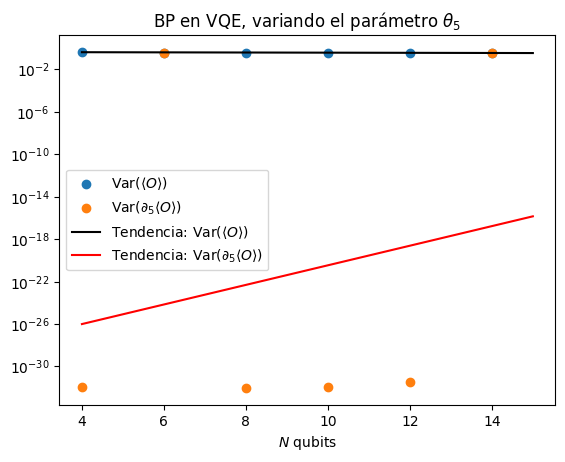


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.33983310318306637
Varianza de la derivada: 7.659212439313815e-33

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.3973012840231213
Varianza de la derivada: 4.736732238536748e-33

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.3524220034303633
Varianza de la derivada: 0.13545925037614678

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.37763815442884924
Varianza de la derivada: 1.2226451708461996e-32

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 0.3311479526433106
Varianza de la derivada: 4.573228939016891e-32

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 0.4070901432852628
Varianza de la derivada: 1.4330215027371574e-31

Pendiente para valor esperado: 0.006080262017950952.
R^2 para valor esperado: 0.07194416737078582.

Pendiente para derivada: -0.7147859954565273.
R^2 para derivada: 0.008495535646536836.


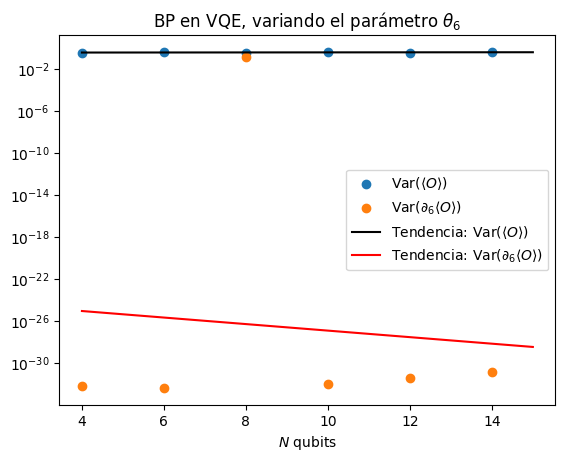


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.32365918179568043
Varianza de la derivada: 0.4461936869154185

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.33826354016611376
Varianza de la derivada: 6.160437713444769e-33

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.3544845659868616
Varianza de la derivada: 0.4046212716258538

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.3645173349534812
Varianza de la derivada: 1.7486441109017277e-32

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 0.40535263724334114
Varianza de la derivada: 3.270103220654215e-32

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 0.34890586626607095
Varianza de la derivada: 1.4253211563462764e-31

Pendiente para valor esperado: 0.013518016316972255.
R^2 para valor esperado: 0.43405429102150983.

Pendiente para derivada: -5.975785642111287.
R^2 para derivada: 0.36290752418436.


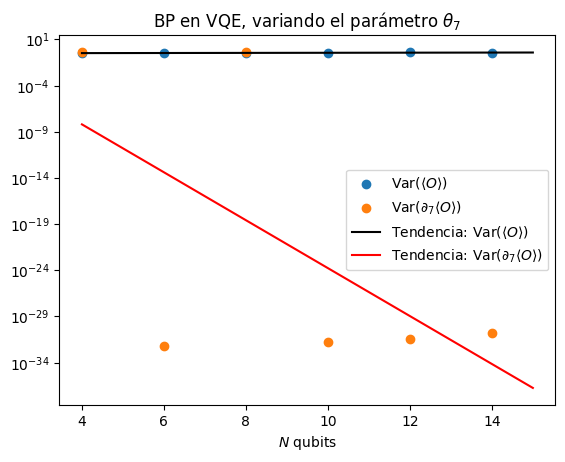


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.3232713667789259
Varianza de la derivada: 3.7219029509520826e-33

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.41584197998258615
Varianza de la derivada: 5.856061671461775e-33

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.32885317626325716
Varianza de la derivada: 4.054866145681253e-33

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.36443216382563565
Varianza de la derivada: 0.08631481033975807

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 0.37368115631347915
Varianza de la derivada: 4.022478353566945e-32

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 0.33477030983993217
Varianza de la derivada: 1.123054246136681e-31

Pendiente para valor esperado: -0.0006173645928327143.
R^2 para valor esperado: 0.0005750597862583001.

Pendiente para derivada: 1.3564512818602545.
R^2 para derivada: 0.03062866057409946.


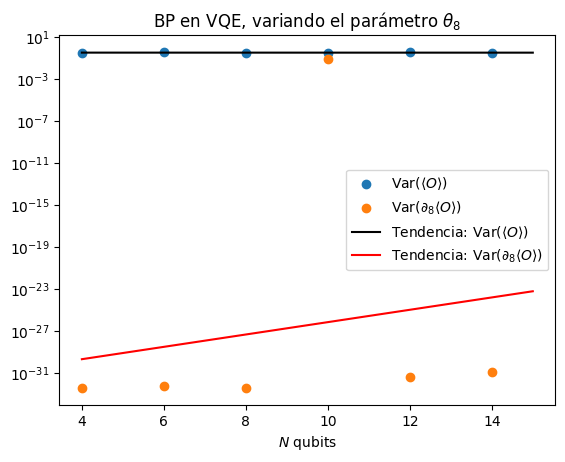


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.4163100565929899
Varianza de la derivada: 3.480177978999271e-33

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.32093097813587773
Varianza de la derivada: 3.886037546891861e-33

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.393213616390478
Varianza de la derivada: 6.352556899024516e-33

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.4069908394815453
Varianza de la derivada: 0.34545618140665146

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 0.3996274024579457
Varianza de la derivada: 4.302368004687566e-32

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 0.387773695418174
Varianza de la derivada: 1.0533578764816813e-31

Pendiente para valor esperado: 0.004818789688085756.
R^2 para valor esperado: 0.036802575985341625.

Pendiente para derivada: 1.3905284585866613.
R^2 para derivada: 0.03096276900023533.


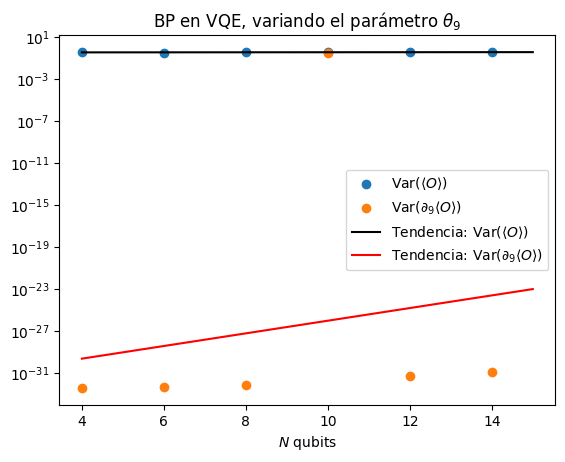


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.36807157099105936
Varianza de la derivada: 3.070776355105054e-33

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.37303994596447454
Varianza de la derivada: 4.136059741017973e-33

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.34832140152122476
Varianza de la derivada: 6.936194264066543e-33

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.33660169357392083
Varianza de la derivada: 2.930277132554659e-33

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 0.32212471903730255
Varianza de la derivada: 2.3384490526506808e-32

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 0.402568266541517
Varianza de la derivada: 1.2757067429851848e-31

Pendiente para valor esperado: -0.0003789860705516203.
R^2 para valor esperado: 0.00031499760590181355.

Pendiente para derivada: 0.32812903645757796.
R^2 para derivada: 0.6847458721449198.


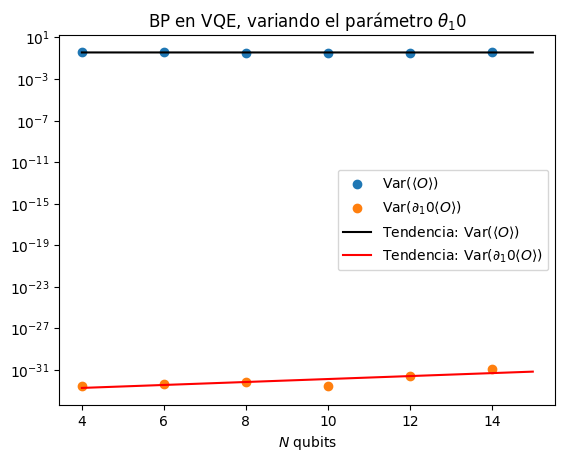


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.3336808615466964
Varianza de la derivada: 0.3278531762130518

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.39630653337378996
Varianza de la derivada: 0.3946018632289603

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.336575286183709
Varianza de la derivada: 7.870284030974301e-33

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.37010557360426566
Varianza de la derivada: 7.717445338594795e-33

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 0.34507387371167825
Varianza de la derivada: 6.843056184280694e-32

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 0.4323068304572331
Varianza de la derivada: 1.539118004138854e-31

Pendiente para valor esperado: 0.013920440660229402.
R^2 para valor esperado: 0.25529614251560373.

Pendiente para derivada: -8.023959103151777.
R^2 para derivada: 0.6582901403521824.


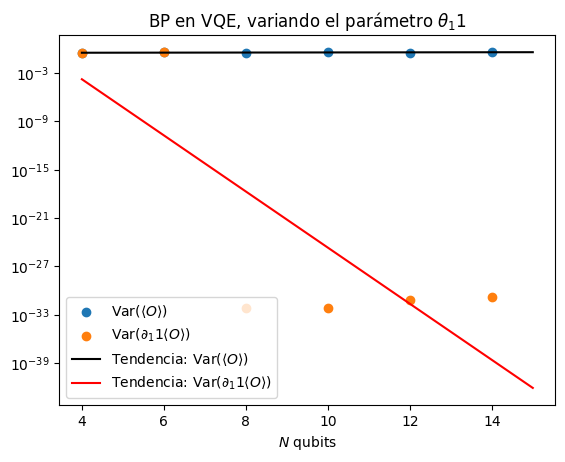

In [193]:
# Log scale

data = []
obs  = SparsePauliOp.from_list([("ZZ",1)])

for i in np.linspace(0,11,12):
    data.append(var.variance_vs_nQubits(build_ala_ansatz, 4, 15, obs, int(i), 100, print_info=True, plot_info=True, do_regress=True, only_even_qubits=True))

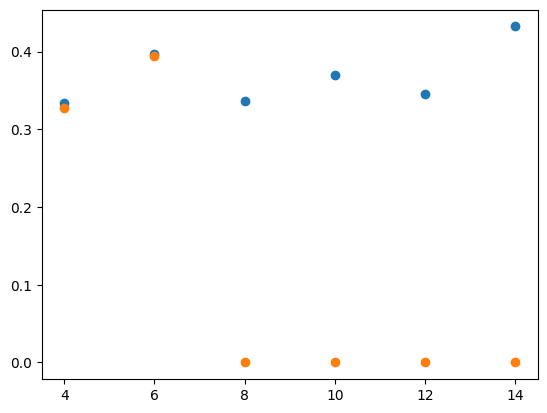

In [203]:
import matplotlib.pyplot as plt

plt.scatter(data[11]["n_qubits"], data[11]["var_value"])
plt.scatter(data[11]["n_qubits"], data[11]["var_deriv"])

/tmp/ipykernel_4596/530120945.py:13: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x)


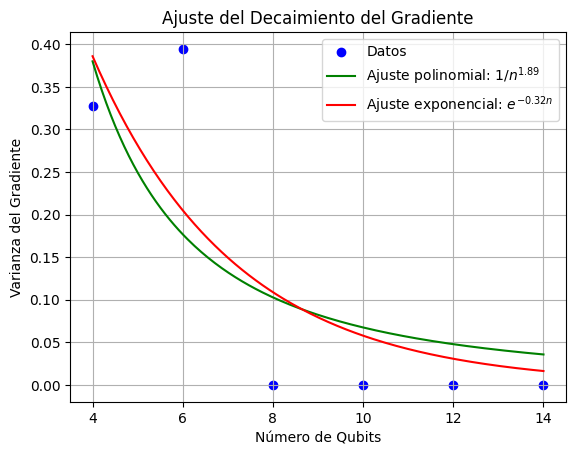

In [198]:
from scipy.optimize import curve_fit

x = data[11]["n_qubits"]
y = data[11]["var_deriv"]

x_range = np.linspace(min(x), max(x), 200)

# Modelos a probar
def poly(x, a, b):
    return a / x**b

def expo(x, a, b):
    return a * np.exp(-b * x)

# Ajuste
popt_poly, _ = curve_fit(poly, x, y, maxfev=10000)
popt_exp, _ = curve_fit(expo, x, y, maxfev=10000)

# Curvas ajustadas
y_poly_fit = poly(x_range, *popt_poly)
y_exp_fit = expo(x_range, *popt_exp)

# Dibujado
plt.scatter(x, y, label="Datos", color="blue")
plt.plot(x_range, y_poly_fit, label=f"Ajuste polinomial: $1/n^{{{popt_poly[1]:.2f}}}$", color="green")
plt.plot(x_range, y_exp_fit, label=f"Ajuste exponencial: $e^{{-{popt_exp[1]:.2f}n}}$", color="red")
plt.xlabel("Número de Qubits")
plt.ylabel("Varianza del Gradiente")
plt.title("Ajuste del Decaimiento del Gradiente")
plt.legend()
plt.grid(True)
plt.show()


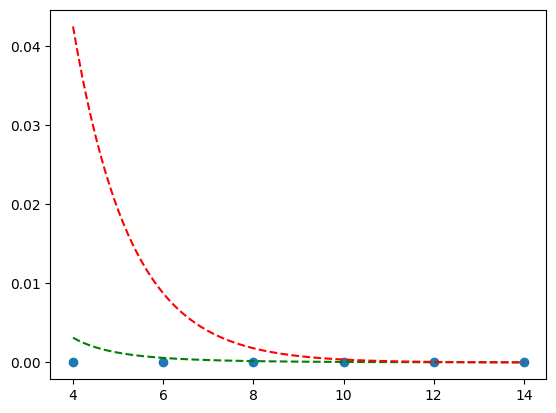

In [185]:
plt.scatter(data[0]["n_qubits"], data[0]["var_deriv"])

x = data[0]["n_qubits"]

x_range = np.linspace(min(x), max(x), 100)

# Curvas de referencia ajustables
poly_decay = 1 / x_range**4.16       # Decrece polinomialmente
exp_decay  = np.exp(-0.79 * x_range)   # Decrece exponencialmente

plt.plot(x_range, poly_decay, label="Decaimiento polinomial ~ 1/n²", linestyle="--", color="green")
plt.plot(x_range, exp_decay, label="Decaimiento exponencial ~ e^{-0.5n}", linestyle="--", color="red")


## Alternating Layered Ansatz (Global Observable: H2)


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.05713865759048521
Varianza de la derivada: 0.03621718828331316

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.04807830096437548
Varianza de la derivada: 0.003564933260222976

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.05597711282430016
Varianza de la derivada: 1.2299065662054662e-32

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.05659038245433548
Varianza de la derivada: 2.2892065542173343e-32

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 0.05503670334461305
Varianza de la derivada: 3.529990772748699e-32

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 0.058368845397027996
Varianza de la derivada: 1.1770790782029022e-31

Pendiente para valor esperado: 0.007470157857882668.
R^2 para valor esperado: 0.16150003645429775.

Pendiente para derivada: -7.703251261547938.
R^2 para derivada: 0.6728518125320085.


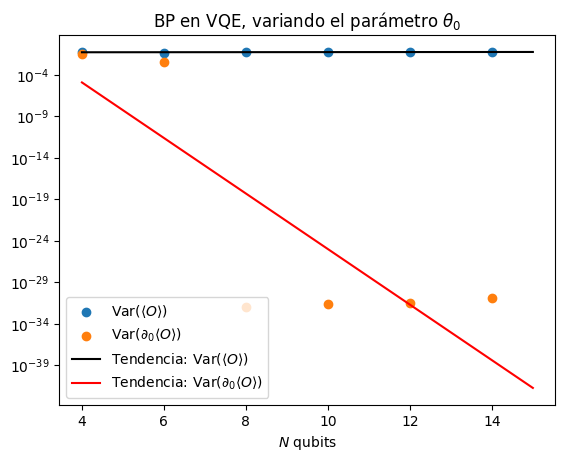


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.06458006186596686
Varianza de la derivada: 0.026231198760760806

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.04129266922448654
Varianza de la derivada: 0.004704801837937554

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.04497606298378558
Varianza de la derivada: 1.3834648125313493e-32

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.04675489819377539
Varianza de la derivada: 1.808609995894943e-32

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 0.06565353467624341
Varianza de la derivada: 3.795900068310357e-32

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 0.05497182694550186
Varianza de la derivada: 1.3792208333058979e-31

Pendiente para valor esperado: 0.008921192105096936.
R^2 para valor esperado: 0.029349877844060263.

Pendiente para derivada: -7.682714124948031.
R^2 para derivada: 0.6703526445271493.


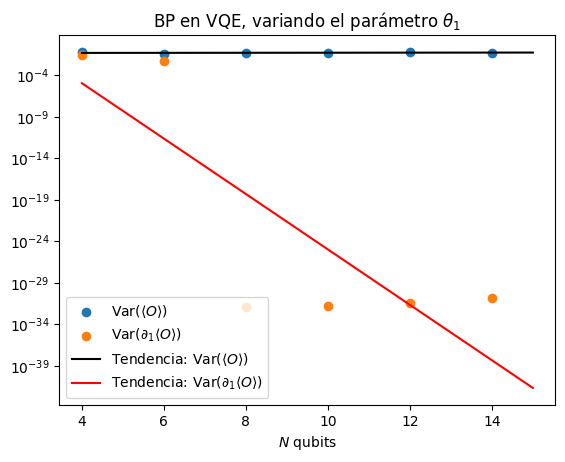


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.08221660747134132
Varianza de la derivada: 0.033438259729664896

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.05677740058336549
Varianza de la derivada: 0.026240562017616778

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.043206612652200896
Varianza de la derivada: 0.0016608718198525612

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.041569628943438935
Varianza de la derivada: 1.6400911257610596e-32

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 0.07513105623184516
Varianza de la derivada: 0.022436595907017874

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 0.04591354419813426
Varianza de la derivada: 0.0162764567710264

Pendiente para valor esperado: -0.030161752072438573.
R^2 para valor esperado: 0.1485007202187403.

Pendiente para derivada: -1.012247183404524.
R^2 para derivada: 0.018094478858027643.


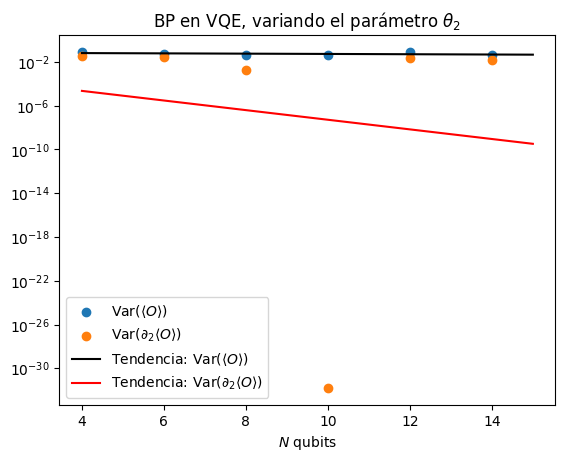


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.06982456714782968
Varianza de la derivada: 0.02590499716474417

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.05342109887155324
Varianza de la derivada: 0.020399424926680093

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.05020578003088197
Varianza de la derivada: 0.005756344477114836

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.058152752202105536
Varianza de la derivada: 2.197185621474512e-32

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 0.04540631195458304
Varianza de la derivada: 0.019648011179786463

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 0.06276455906352442
Varianza de la derivada: 0.02013610726484877

Pendiente para valor esperado: -0.012481394774789819.
R^2 para valor esperado: 0.08995493908198611.

Pendiente para derivada: -0.9872898764426613.
R^2 para derivada: 0.017297641050794604.


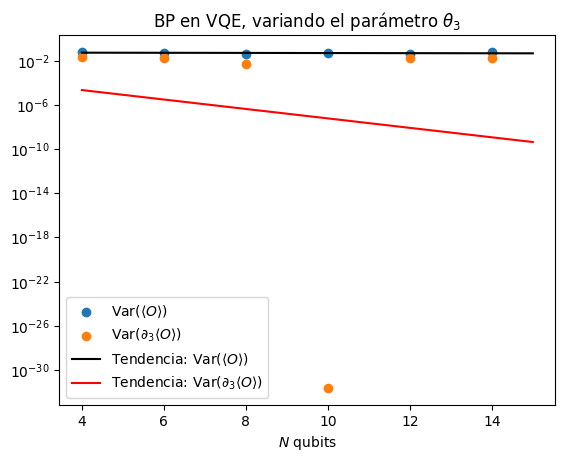


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.0741151309889018
Varianza de la derivada: 0.02954991310225397

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.04205999670266655
Varianza de la derivada: 0.0226868891653581

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.054337013532132425
Varianza de la derivada: 0.021647683171772156

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.04518592068661318
Varianza de la derivada: 0.0020181236400471873

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 0.05557589572677581
Varianza de la derivada: 4.119949337033176e-32

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 0.05024192466909052
Varianza de la derivada: 0.022724005706393262

Pendiente para valor esperado: -0.0184616003673421.
R^2 para valor esperado: 0.1212022986691791.

Pendiente para derivada: -2.987553812692523.
R^2 para derivada: 0.1617387866273131.


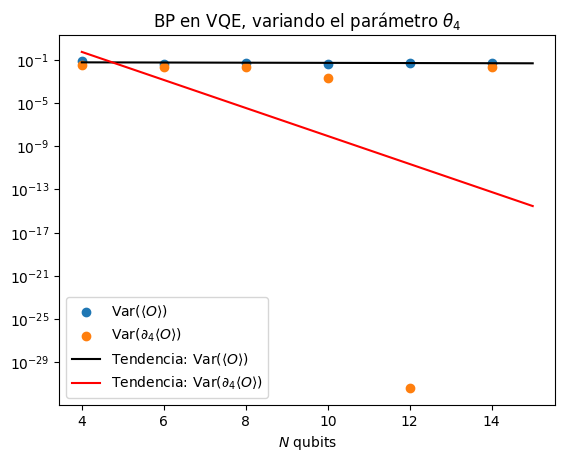


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.062090332417961254
Varianza de la derivada: 0.02772574657401158

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.04410115999604819
Varianza de la derivada: 0.02510432092861485

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.05969771523027961
Varianza de la derivada: 0.015449525128482073

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.0513663593220103
Varianza de la derivada: 0.008449264665889899

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 0.05430180698471009
Varianza de la derivada: 5.572031181623153e-32

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 0.050676667551791975
Varianza de la derivada: 0.019530412274097186

Pendiente para valor esperado: -0.007738850378193808.
R^2 para valor esperado: 0.05494905505926861.

Pendiente para derivada: -2.9599455136617094.
R^2 para derivada: 0.15942555204601375.


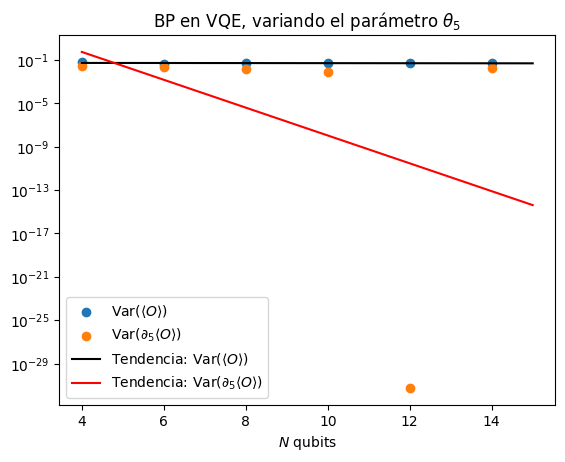


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.05329777383771594
Varianza de la derivada: 0.03454751730537897

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.05998752683198482
Varianza de la derivada: 6.149417275230668e-33

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.06944693049663136
Varianza de la derivada: 0.03139315440393798

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.05695146997179104
Varianza de la derivada: 0.019386561467195113

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 0.05544383287762392
Varianza de la derivada: 4.1092007220135496e-32

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 0.049842553479577806
Varianza de la derivada: 1.3497987867314828e-31

Pendiente para valor esperado: -0.01099698790889651.
R^2 para valor esperado: 0.1305497882855062.

Pendiente para derivada: -4.762249351657621.
R^2 para derivada: 0.22267926178050718.


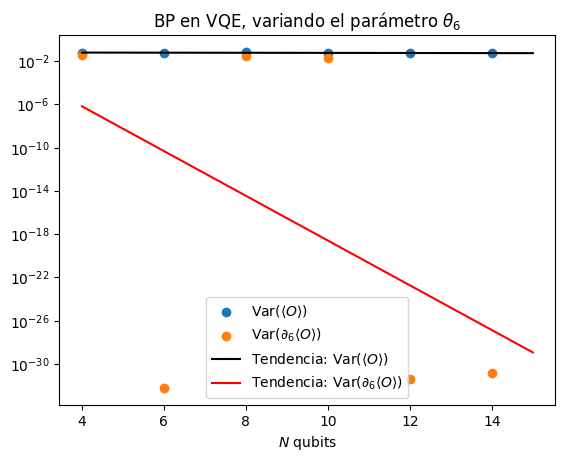


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.062061816092897654
Varianza de la derivada: 0.02601328062835351

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.04734194389250252
Varianza de la derivada: 0.007624897341400216

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.0499779504523204
Varianza de la derivada: 0.021519104777623022

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.04218156403759379
Varianza de la derivada: 0.02294764085411598

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 0.05129322074882702
Varianza de la derivada: 4.0312872261133655e-32

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 0.0548491698737068
Varianza de la derivada: 1.042962516886625e-31

Pendiente para valor esperado: -0.007811888950672431.
R^2 para valor esperado: 0.04976648613216632.

Pendiente para derivada: -7.723103589924002.
R^2 para derivada: 0.6814860208908596.


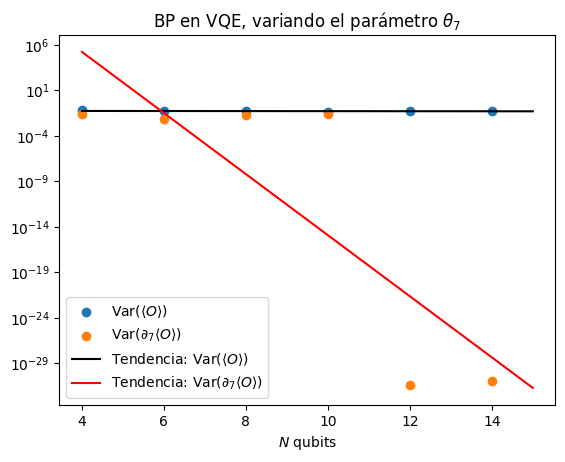


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.0708069668146111
Varianza de la derivada: 0.03074137078487638

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.04397585646783942
Varianza de la derivada: 0.028302907796746442

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.0514639408777016
Varianza de la derivada: 6.815866073186429e-33

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.05246261782388854
Varianza de la derivada: 0.029159899648001586

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 0.04018423863057527
Varianza de la derivada: 0.004458042984045354

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 0.05157330953217249
Varianza de la derivada: 1.1936913795312087e-31

Pendiente para valor esperado: -0.026229197921029793.
R^2 para valor esperado: 0.25693774816583204.

Pendiente para derivada: -3.908833957730107.
R^2 para derivada: 0.17009209881506532.


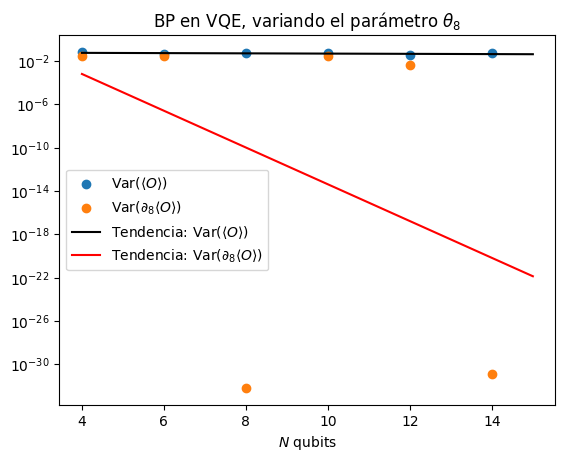


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.07331836996769209
Varianza de la derivada: 0.01666604993627776

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.05053866677919676
Varianza de la derivada: 0.02845682277347878

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.04899829534838795
Varianza de la derivada: 7.8346059765695e-33

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.062215032432682144
Varianza de la derivada: 0.021091275008156277

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 0.04623210099442241
Varianza de la derivada: 0.007804612381230734

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 0.05928152219441185
Varianza de la derivada: 1.5403710954725552e-31

Pendiente para valor esperado: -0.015584993374452587.
R^2 para valor esperado: 0.11183248593880353.

Pendiente para derivada: -3.8297403187014196.
R^2 para derivada: 0.1647018340741544.


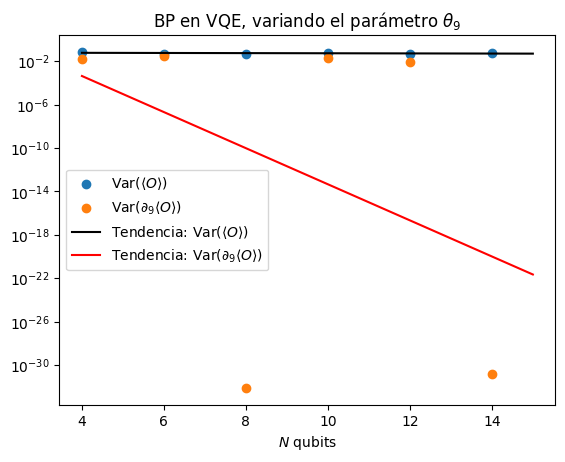


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.05970035552557199
Varianza de la derivada: 0.037380807334767896

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.05048240994158815
Varianza de la derivada: 0.030984412680403185

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.04939809747863648
Varianza de la derivada: 1.0170142701529012e-32

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.05041670907846409
Varianza de la derivada: 4.8264574778321895e-33

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 0.047734391198686416
Varianza de la derivada: 0.018479407431395367

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 0.03341613486878745
Varianza de la derivada: 1.230086833248261e-31

Pendiente para valor esperado: -0.0435571901882176.
R^2 para valor esperado: 0.7198937224261979.

Pendiente para derivada: -4.8818300210080245.
R^2 para derivada: 0.23006453671114022.


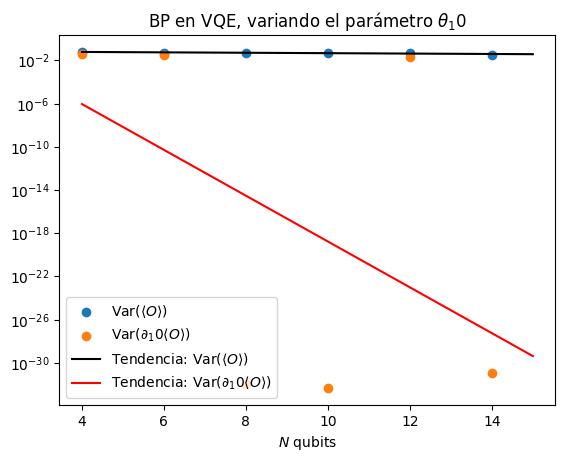


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.07990174742371785
Varianza de la derivada: 0.019838123432921115

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.04551056597195368
Varianza de la derivada: 0.018252100455786142

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.053260471274545876
Varianza de la derivada: 0.007670788646751529

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.05640328423492716
Varianza de la derivada: 2.0798425618228857e-32

Calculando varianzas con 12 qubits.

Varianza del valor esperado: 0.06253767999978752
Varianza de la derivada: 0.019173608781397997

Calculando varianzas con 14 qubits.

Varianza del valor esperado: 0.060397154906872724
Varianza de la derivada: 1.8325077050168777e-31

Pendiente para valor esperado: -0.005549592076672592.
R^2 para valor esperado: 0.012269202773042632.

Pendiente para derivada: -5.7457692120238075.
R^2 para derivada: 0.378251974743377.


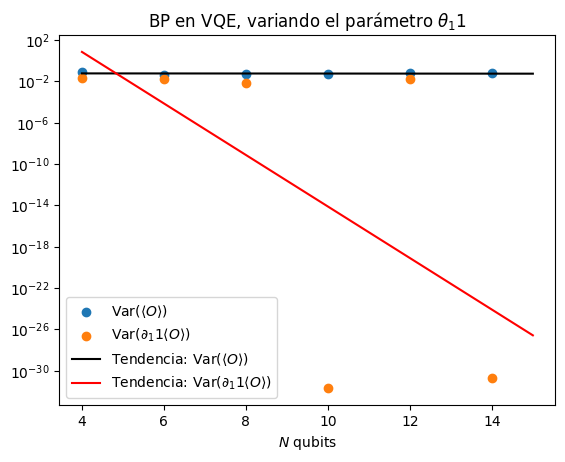

In [188]:
with open("data/H2_hamiltonian.pkl", "rb") as f:
    obs = pickle.load(f)

data_h2 = []

for i in np.linspace(0,11,12):
    data_h2.append(var.variance_vs_nQubits(build_ala_ansatz, 4, 15, obs, int(i), 100, print_info=True, plot_info=True, do_regress=True, only_even_qubits=True))


Preparando ejecución para 4 qubits.
Se usarán 16 parámetros


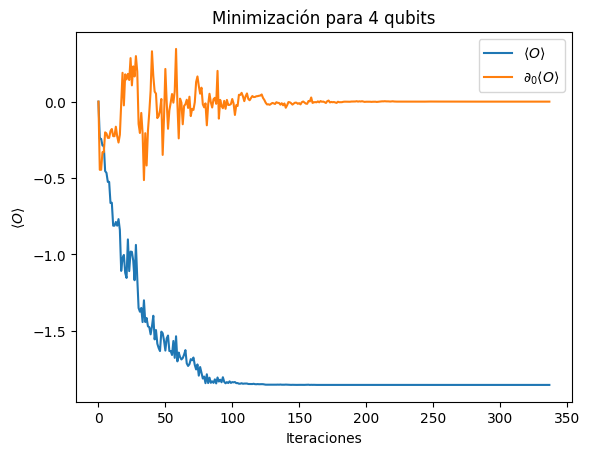

Fin ejecución con 4 qubits. Mínimo encontrado: -1.8537095139806565


{'n_qubits': [4], 'minimum_values': [-1.8537095139806565]}

In [103]:
# Estudiamos la eficacia el ansatz de cara a estimar la energía mínima de la molécula de hidrógeno

with open("data/H2_hamiltonian.pkl", "rb") as f:
    obs = pickle.load(f)

cf.VQE_minimization_BP(build_ala_ansatz, 4, 4, obs, [0])

## NLocal (Global Observable: H2)


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.03758159096262606
Varianza de la derivada: 0.013869650791917881

Calculando varianzas con 5 qubits.

Varianza del valor esperado: 0.02535225524775786
Varianza de la derivada: 0.005831019912263429

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.017450672010136142
Varianza de la derivada: 0.003383131847539272

Calculando varianzas con 7 qubits.

Varianza del valor esperado: 0.016545377604985645
Varianza de la derivada: 0.0018392647690662156

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.013109484398224031
Varianza de la derivada: 0.0006094923360173754

Calculando varianzas con 9 qubits.

Varianza del valor esperado: 0.014060697276528804
Varianza de la derivada: 0.00039789114934070564

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.0118807129651081
Varianza de la derivada: 0.0002738874607628726

Calculando varianzas con 11 qubits.

Varianza del valor esperado: 

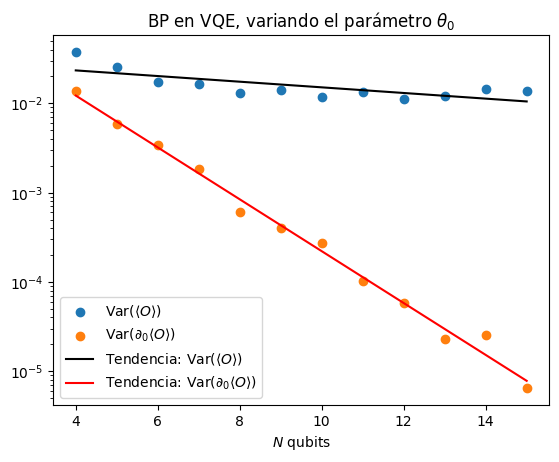


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.03237442793135375
Varianza de la derivada: 0.014061536824078926

Calculando varianzas con 5 qubits.

Varianza del valor esperado: 0.02846553274745408
Varianza de la derivada: 0.011527760882610481

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.01877246239516008
Varianza de la derivada: 0.006368454252528344

Calculando varianzas con 7 qubits.

Varianza del valor esperado: 0.02105866717078667
Varianza de la derivada: 0.003153681382739443

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.016525984308353517
Varianza de la derivada: 0.0013134449757532727

Calculando varianzas con 9 qubits.

Varianza del valor esperado: 0.013425695563114348
Varianza de la derivada: 0.0006414259714686962

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.009919001496099063
Varianza de la derivada: 0.0003034985317761981

Calculando varianzas con 11 qubits.

Varianza del valor esperado: 0.

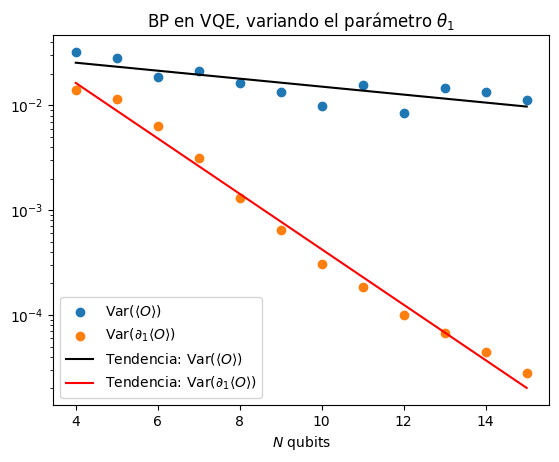


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.03385489247089128
Varianza de la derivada: 0.015391287814879471

Calculando varianzas con 5 qubits.

Varianza del valor esperado: 0.032146837187665596
Varianza de la derivada: 0.010718815639169488

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.020234776489501945
Varianza de la derivada: 0.007069160678463464

Calculando varianzas con 7 qubits.

Varianza del valor esperado: 0.015783923723650728
Varianza de la derivada: 0.003177479372549385

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.011334648331627874
Varianza de la derivada: 0.0021507217112281328

Calculando varianzas con 9 qubits.

Varianza del valor esperado: 0.015536851743928968
Varianza de la derivada: 0.0012526478649807714

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.013856667572142243
Varianza de la derivada: 0.0005429994634610499

Calculando varianzas con 11 qubits.

Varianza del valor esperado:

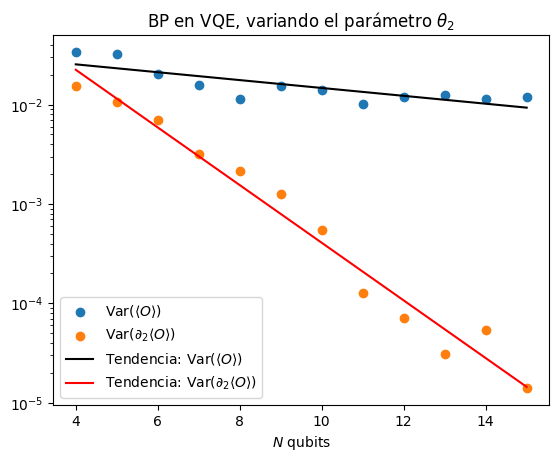


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.034683877167174346
Varianza de la derivada: 0.01289594742119776

Calculando varianzas con 5 qubits.

Varianza del valor esperado: 0.0281532667905811
Varianza de la derivada: 0.008300454948134141

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.02011348040559811
Varianza de la derivada: 0.007820090004768977

Calculando varianzas con 7 qubits.

Varianza del valor esperado: 0.016188349705755337
Varianza de la derivada: 0.005784210595036723

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.014429231019433388
Varianza de la derivada: 0.002095487545614476

Calculando varianzas con 9 qubits.

Varianza del valor esperado: 0.014688296158219236
Varianza de la derivada: 0.0012939691617188018

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.009017109159871398
Varianza de la derivada: 0.000711373277948824

Calculando varianzas con 11 qubits.

Varianza del valor esperado: 0.01

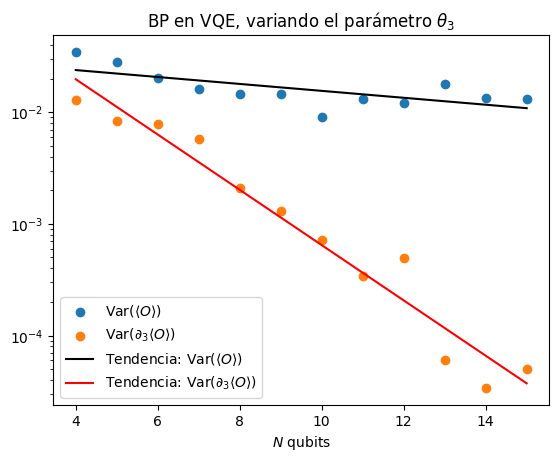


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.04012560981866202
Varianza de la derivada: 0.0028775342704224845

Calculando varianzas con 5 qubits.

Varianza del valor esperado: 0.029905620851389276
Varianza de la derivada: 0.00802523135563577

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.015551818161629583
Varianza de la derivada: 0.005297591868786804

Calculando varianzas con 7 qubits.

Varianza del valor esperado: 0.009499773548787479
Varianza de la derivada: 0.00454492377686054

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.015852695908201726
Varianza de la derivada: 0.004180131568539588

Calculando varianzas con 9 qubits.

Varianza del valor esperado: 0.01288746217971721
Varianza de la derivada: 0.00195968977923993

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.012178371891205068
Varianza de la derivada: 0.0015895028147285986

Calculando varianzas con 11 qubits.

Varianza del valor esperado: 0.01

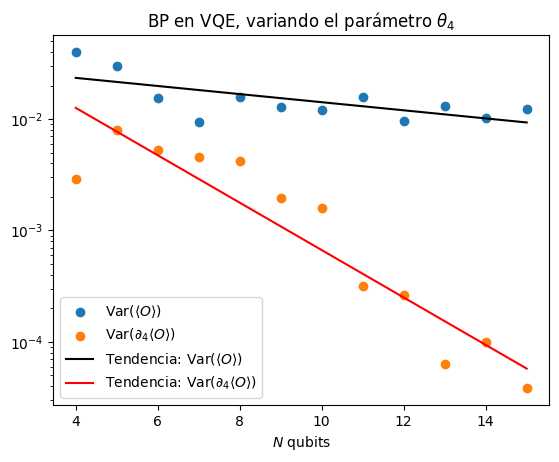


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.03556741393564577
Varianza de la derivada: 0.005196862335728237

Calculando varianzas con 5 qubits.

Varianza del valor esperado: 0.031240965565375717
Varianza de la derivada: 0.001584195586181047

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.021124645953884212
Varianza de la derivada: 0.0077939159928464095

Calculando varianzas con 7 qubits.

Varianza del valor esperado: 0.013852010774780425
Varianza de la derivada: 0.0062638340977176025

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.016580729062433613
Varianza de la derivada: 0.00735119415878305

Calculando varianzas con 9 qubits.

Varianza del valor esperado: 0.014958623675313854
Varianza de la derivada: 0.0033152941717423997

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.011632010094043204
Varianza de la derivada: 0.0015884552951964375

Calculando varianzas con 11 qubits.

Varianza del valor esperado:

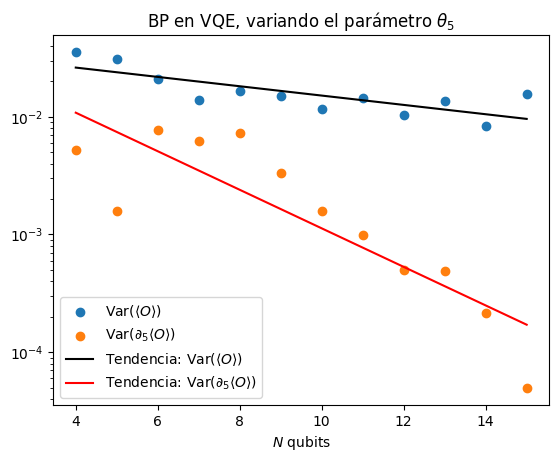


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.041476505916917386
Varianza de la derivada: 0.010566505103519464

Calculando varianzas con 5 qubits.

Varianza del valor esperado: 0.032086078331426744
Varianza de la derivada: 0.0035601215448608004

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.019046441298963296
Varianza de la derivada: 0.0004971745392208319

Calculando varianzas con 7 qubits.

Varianza del valor esperado: 0.01702655649987031
Varianza de la derivada: 0.00816337123351042

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.010821185522710598
Varianza de la derivada: 0.0053308437898075475

Calculando varianzas con 9 qubits.

Varianza del valor esperado: 0.012318939313440741
Varianza de la derivada: 0.005113483023983115

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.013779285228951966
Varianza de la derivada: 0.0038648787123448354

Calculando varianzas con 11 qubits.

Varianza del valor esperado:

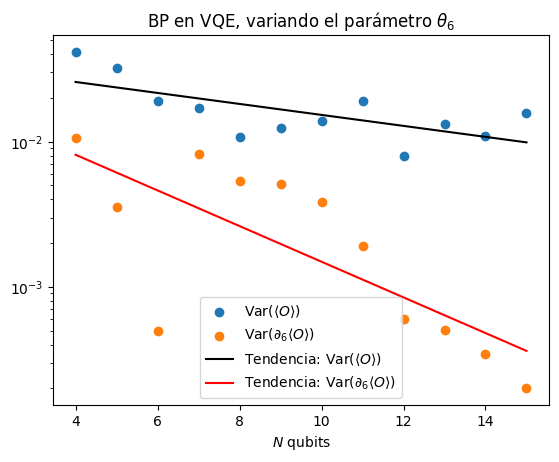


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.05017775381701727
Varianza de la derivada: 0.015508093637396376

Calculando varianzas con 5 qubits.

Varianza del valor esperado: 0.028361201536561215
Varianza de la derivada: 0.004698031452302546

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.0159687650386436
Varianza de la derivada: 0.0015206229439782672

Calculando varianzas con 7 qubits.

Varianza del valor esperado: 0.012422536481864479
Varianza de la derivada: 0.00014413474696895517

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.016619365979697712
Varianza de la derivada: 0.005918220982409536

Calculando varianzas con 9 qubits.

Varianza del valor esperado: 0.01289316120514278
Varianza de la derivada: 0.006210861458107697

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.014638131467057393
Varianza de la derivada: 0.0052197281410397475

Calculando varianzas con 11 qubits.

Varianza del valor esperado: 0

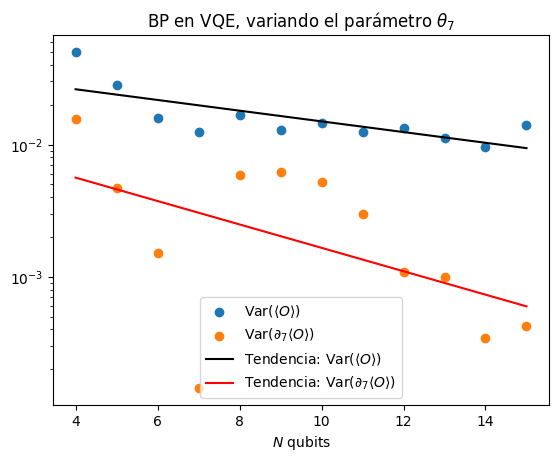


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.041323794483209546
Varianza de la derivada: 0.012302928699789608

Calculando varianzas con 5 qubits.

Varianza del valor esperado: 0.028087891538563167
Varianza de la derivada: 0.010361337630246024

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.016998161949192393
Varianza de la derivada: 0.0024210460805811286

Calculando varianzas con 7 qubits.

Varianza del valor esperado: 0.01355272871376748
Varianza de la derivada: 0.0007344082360830881

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.013065196861564939
Varianza de la derivada: 7.434265129385217e-05

Calculando varianzas con 9 qubits.

Varianza del valor esperado: 0.011927908046295076
Varianza de la derivada: 0.007599048114647466

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.01004594922344462
Varianza de la derivada: 0.005463225802194608

Calculando varianzas con 11 qubits.

Varianza del valor esperado: 

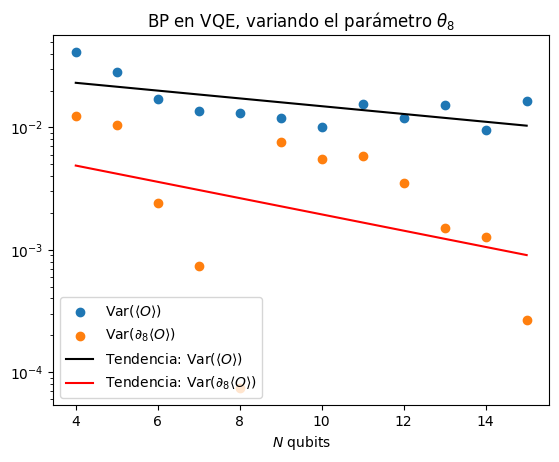


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.028093320697577154
Varianza de la derivada: 0.019484650486815993

Calculando varianzas con 5 qubits.

Varianza del valor esperado: 0.02819053697053222
Varianza de la derivada: 0.016476800867290732

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.01620791542655941
Varianza de la derivada: 0.0020499733647385125

Calculando varianzas con 7 qubits.

Varianza del valor esperado: 0.0160106012264645
Varianza de la derivada: 0.0015211738733848209

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.01322557640273523
Varianza de la derivada: 0.0003027099201341683

Calculando varianzas con 9 qubits.

Varianza del valor esperado: 0.011915697787501303
Varianza de la derivada: 2.256926108861139e-05

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.011926993041030377
Varianza de la derivada: 0.005620197705224882

Calculando varianzas con 11 qubits.

Varianza del valor esperado: 0.

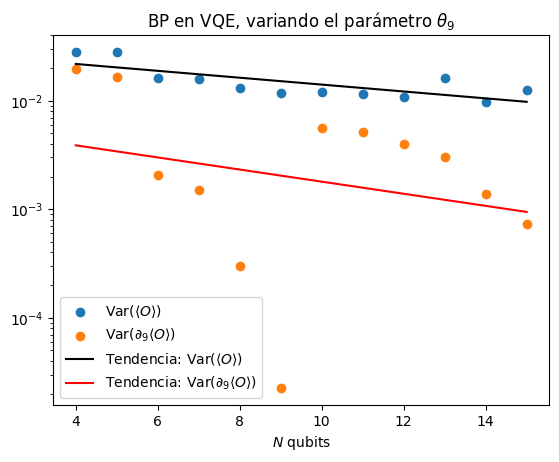


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.03915455523026441
Varianza de la derivada: 0.0030438700555070904

Calculando varianzas con 5 qubits.

Varianza del valor esperado: 0.033833085985383066
Varianza de la derivada: 0.00875194207216741

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.015028558982907862
Varianza de la derivada: 0.004138853733708315

Calculando varianzas con 7 qubits.

Varianza del valor esperado: 0.016024098143824283
Varianza de la derivada: 0.000943153455661258

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.015882581976743672
Varianza de la derivada: 0.0009370438221816451

Calculando varianzas con 9 qubits.

Varianza del valor esperado: 0.011672871600213163
Varianza de la derivada: 0.00011817814004848512

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.008555463487172489
Varianza de la derivada: 3.454086395051568e-05

Calculando varianzas con 11 qubits.

Varianza del valor esperado

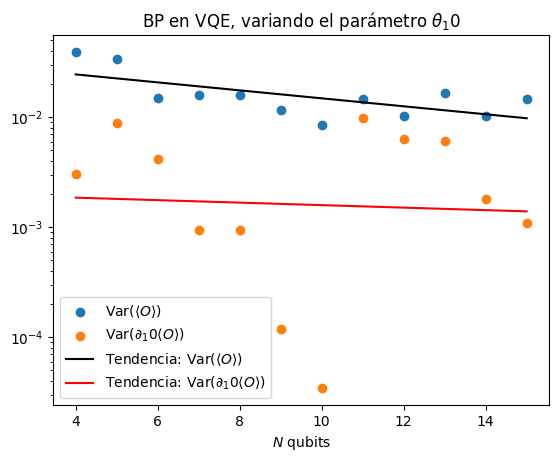


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.0331482924573304
Varianza de la derivada: 0.003479086113829765

Calculando varianzas con 5 qubits.

Varianza del valor esperado: 0.026784434062092202
Varianza de la derivada: 0.013051580624327794

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.018585774269096297
Varianza de la derivada: 0.005379195496027967

Calculando varianzas con 7 qubits.

Varianza del valor esperado: 0.014610907364530565
Varianza de la derivada: 0.002171935563786349

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.010943316452174515
Varianza de la derivada: 0.0024938791074744487

Calculando varianzas con 9 qubits.

Varianza del valor esperado: 0.014662803327173924
Varianza de la derivada: 0.00041786850354423615

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.011217879425260096
Varianza de la derivada: 4.33974227107669e-05

Calculando varianzas con 11 qubits.

Varianza del valor esperado: 

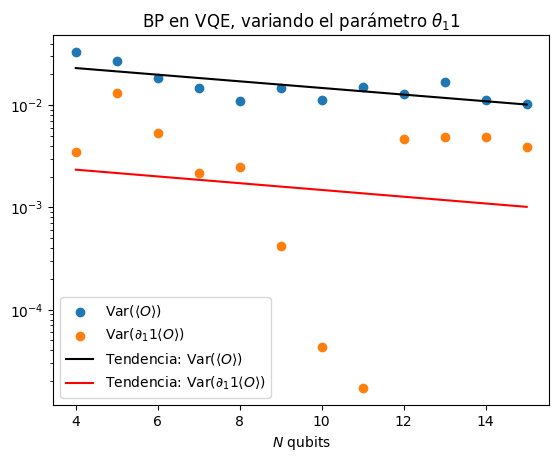


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.033812903899919304
Varianza de la derivada: 0.013014326665686018

Calculando varianzas con 5 qubits.

Varianza del valor esperado: 0.0332151978520149
Varianza de la derivada: 0.0010815952718937207

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.01775129196828493
Varianza de la derivada: 0.008500725766255096

Calculando varianzas con 7 qubits.

Varianza del valor esperado: 0.01431967590321773
Varianza de la derivada: 0.0017963004178830205

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.010296884093371901
Varianza de la derivada: 0.0006345006234577359

Calculando varianzas con 9 qubits.

Varianza del valor esperado: 0.012382040585693367
Varianza de la derivada: 0.0014324018240285932

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.013711207909260219
Varianza de la derivada: 9.084667257819038e-05

Calculando varianzas con 11 qubits.

Varianza del valor esperado: 

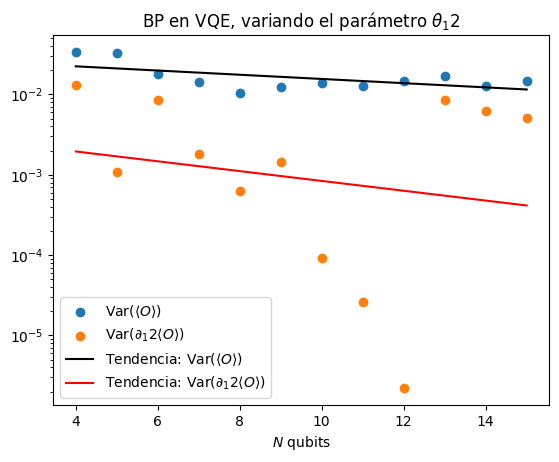


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.03786146717253727
Varianza de la derivada: 0.016791496128229475

Calculando varianzas con 5 qubits.

Varianza del valor esperado: 0.03190354874566451
Varianza de la derivada: 0.002446644197750477

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.01945215323953873
Varianza de la derivada: 0.009769743013796798

Calculando varianzas con 7 qubits.

Varianza del valor esperado: 0.015263356401526927
Varianza de la derivada: 0.005467603379437194

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.015758991323624384
Varianza de la derivada: 0.0007419332455533205

Calculando varianzas con 9 qubits.

Varianza del valor esperado: 0.011005459738411917
Varianza de la derivada: 9.597824763052086e-05

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.014308405268966156
Varianza de la derivada: 0.001118095371468456

Calculando varianzas con 11 qubits.

Varianza del valor esperado: 0.

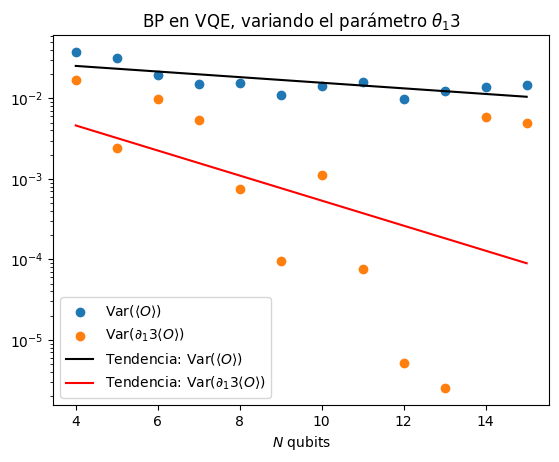


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.03469405266726568
Varianza de la derivada: 0.007499018491043623

Calculando varianzas con 5 qubits.

Varianza del valor esperado: 0.022175058057419688
Varianza de la derivada: 8.426863606942363e-05

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.015451091369072021
Varianza de la derivada: 0.008163246600086339

Calculando varianzas con 7 qubits.

Varianza del valor esperado: 0.014906472105779667
Varianza de la derivada: 0.005897506902956643

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.013359236003543771
Varianza de la derivada: 0.0011371040318370023

Calculando varianzas con 9 qubits.

Varianza del valor esperado: 0.015147314513149409
Varianza de la derivada: 0.00046565621112168725

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.011357352262143421
Varianza de la derivada: 0.0021562129402891987

Calculando varianzas con 11 qubits.

Varianza del valor esperad

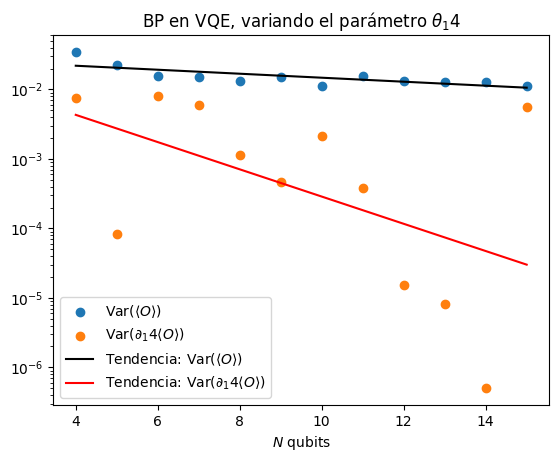


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.039036289988887855
Varianza de la derivada: 0.014352291701773247

Calculando varianzas con 5 qubits.

Varianza del valor esperado: 0.02784732812794319
Varianza de la derivada: 0.008995951109167448

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.017254850402803154
Varianza de la derivada: 5.132526264594208e-33

Calculando varianzas con 7 qubits.

Varianza del valor esperado: 0.013121341448324586
Varianza de la derivada: 0.0054946019500436314

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.01261071589177264
Varianza de la derivada: 0.0013337470940237217

Calculando varianzas con 9 qubits.

Varianza del valor esperado: 0.012162919355174653
Varianza de la derivada: 0.0005093921880495205

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.012559131901798349
Varianza de la derivada: 4.418995231003178e-05

Calculando varianzas con 11 qubits.

Varianza del valor esperado

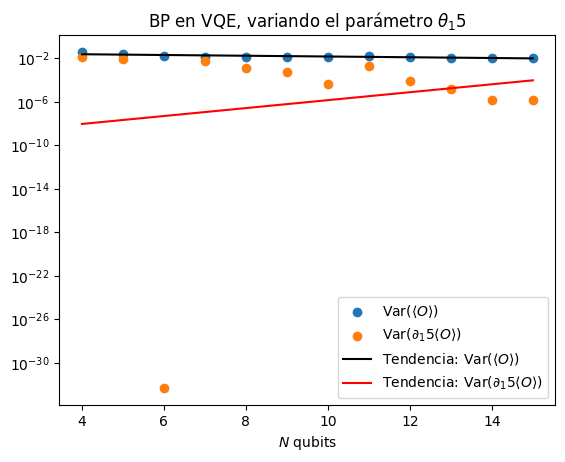


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.03896757843067902
Varianza de la derivada: 0.00016923856622700438

Calculando varianzas con 5 qubits.

Varianza del valor esperado: 0.023950961330116996
Varianza de la derivada: 0.010897009441562461

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.016799550437563565
Varianza de la derivada: 0.0012351318375556153

Calculando varianzas con 7 qubits.

Varianza del valor esperado: 0.01349888813786672
Varianza de la derivada: 0.0075853358519855675

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.010711743611309825
Varianza de la derivada: 0.003822332409099457

Calculando varianzas con 9 qubits.

Varianza del valor esperado: 0.01298960751110522
Varianza de la derivada: 0.0006387577115767656

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.012505484623069845
Varianza de la derivada: 0.00014180209224413655

Calculando varianzas con 11 qubits.

Varianza del valor esperad

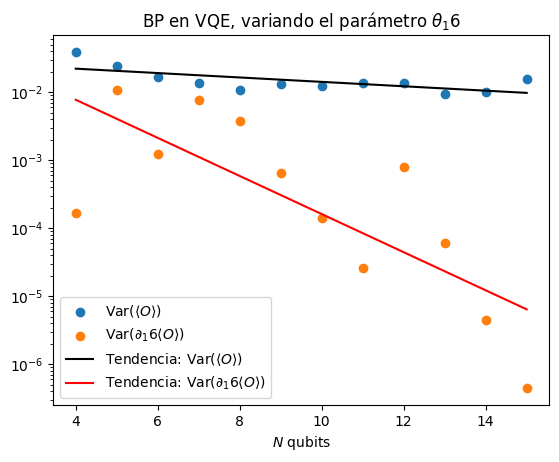


Calculando varianzas con 4 qubits.

Varianza del valor esperado: 0.03165401224271326
Varianza de la derivada: 0.00019438711833559858

Calculando varianzas con 5 qubits.

Varianza del valor esperado: 0.03155413873490378
Varianza de la derivada: 0.008564503503993199

Calculando varianzas con 6 qubits.

Varianza del valor esperado: 0.016513785597905794
Varianza de la derivada: 0.0031870242450346077

Calculando varianzas con 7 qubits.

Varianza del valor esperado: 0.016745947723514464
Varianza de la derivada: 5.75467867382906e-33

Calculando varianzas con 8 qubits.

Varianza del valor esperado: 0.012531958774520291
Varianza de la derivada: 0.005838021811657462

Calculando varianzas con 9 qubits.

Varianza del valor esperado: 0.015554362561942998
Varianza de la derivada: 0.0011228802309032342

Calculando varianzas con 10 qubits.

Varianza del valor esperado: 0.00931017987788719
Varianza de la derivada: 0.00020696679815288251

Calculando varianzas con 11 qubits.

Varianza del valor esperado

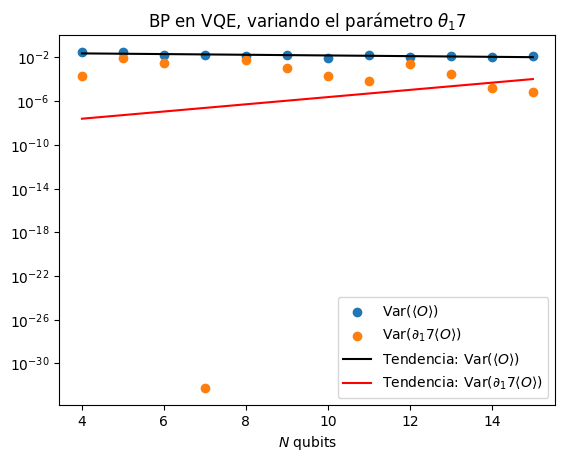

In [ ]:
def build_Nlocal(num_qubits):
    ansatz, num_params = anz.build_Nlocal_ansatz(num_qubits, layers=2)
    return ansatz, ansatz.num_parameters

with open("data/H2_hamiltonian.pkl", "rb") as f:
    obs = pickle.load(f)

data = []

for i in np.linspace(0, 17, 18):
    data.append(var.variance_vs_nQubits(build_Nlocal, 4, 15, obs, int(i), 100, print_info=True, plot_info=True, do_regress=True))

## Alternating Layered Ansatz (Global Observable: H2O)


Calculando varianzas con 14 qubits.

Varianza del valor esperado: 79.44076261263025
Varianza de la derivada: 64.13245198717317

Calculando varianzas con 16 qubits.

Varianza del valor esperado: 79.57364953863062
Varianza de la derivada: 1.8102061098341202

Calculando varianzas con 18 qubits.

Varianza del valor esperado: 64.4437022858956
Varianza de la derivada: 8.900697398769502e-27

Pendiente para valor esperado: -0.05230490241578156.
R^2 para valor esperado: 0.7440088906790004.

Pendiente para derivada: -16.036154596206025.
R^2 para derivada: 0.7915763210389418.


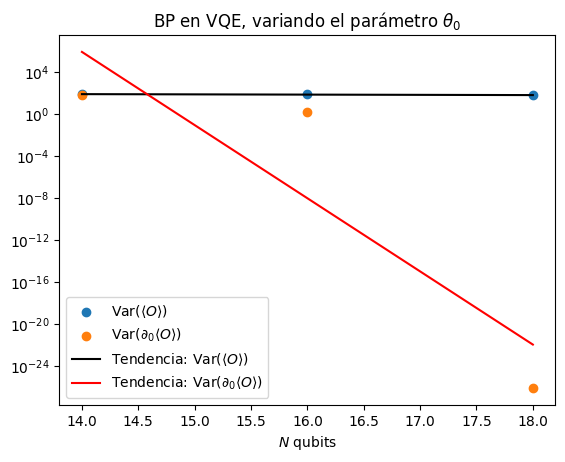

In [201]:
with open("data/H2O_hamiltonian.pkl", "rb") as f:
    obs = pickle.load(f)

data_h2o = var.variance_vs_nQubits(build_ala_ansatz, 14, 18, obs, 0, 100, print_info=True, plot_info=True, do_regress=True, only_even_qubits=True)